In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf

In [3]:
import opendatasets as od
import os
import json

# Step 1: Load your kaggle.json credentials
with open("kaggle.json") as f:
    kaggle_creds = json.load(f)

# Step 2: Set the environment variables for username and key
os.environ["KAGGLE_USERNAME"] = kaggle_creds["username"]
os.environ["KAGGLE_KEY"] = kaggle_creds["key"]

# Step 3: Download the dataset
od.download("https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat")

Skipping, found downloaded files in ".\dog-vs-cat" (use force=True to force download)


In [4]:
#  how to use the datasets
dataset_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\opencv\\dog-vs-cat"

In [5]:
def extract_data(path):
    images  = []
    labels = []

    for root,dirs,files in os.walk(path):
        for file in files:
            if file.endswith(('jpg','png','jpeg')):
                img = cv.imread(os.path.join(root,file))
                img = cv.resize(img, (224, 224))
                images.append(img)
                labels.append(os.path.basename(root))
    return images,labels
        

In [6]:
dog_cat_images, dog_cat_labels = extract_data(dataset_path)

In [7]:
len(dog_cat_images), len(dog_cat_labels)

(1000, 1000)

In [8]:
dog_cat_labels = np.array(dog_cat_labels)

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dog_cat_labels = label_encoder.fit_transform(dog_cat_labels)

In [10]:
dog_cat_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
# # convert images into numpy array:
dog_cat_images = np.array(dog_cat_images)


In [12]:
# scale the images:
dog_cat_images = dog_cat_images / 255.0

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

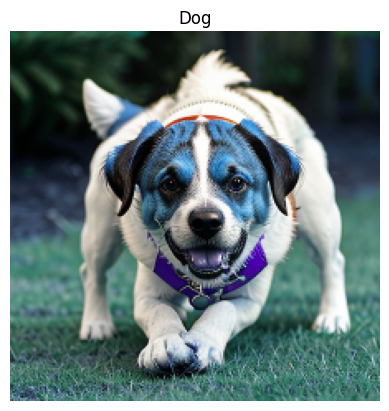

In [13]:
plt.imshow(dog_cat_images[501])
plt.title("Dog" if dog_cat_labels[501] == 1 else "Cat")
plt.axis("off")

In [14]:
# model mkaing useing pre-trained model
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base model layers
    

In [15]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

In [16]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [17]:
# model.fit(
#     dog_cat_images,
#     dog_cat_labels,
#     epochs=10,
#     batch_size=32,
#     validation_split=0.2
# )

fine tuning and Feature Extraction 
Unfreeze and freeze layers
Plateau learning Rate to update and make changes in the learning rate
pointwise and depthwise convolution
how to use the pre-trained model
when to use the pre- trained model and which model to use in which case
different pre-trained models work what are their architecture and how to use them
Some of the transfer learning models "topic" and how to use them



"pre_Trained Model with the fearute "Extraction Technique" is used to train the model on the CIFAR -10"

In [18]:
def download_cifar10():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    return x_train, y_train, x_test, y_test

In [19]:
X_train, y_train, X_test, y_test = download_cifar10()

In [21]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, [224, 224]) / 255.0, y), 
                        num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, [224, 224]) / 255.0, y),
                      num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

In [25]:
print(test_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.uint8, name=None))>


In [23]:
# checking the shape of the data
print("Training data shape:" , X_train.shape)
print("Testing data shape:" , X_test.shape)
print("Training labels shape:" , y_train.shape)
print("Testing labels shape:" , y_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing labels shape: (10000, 1)


In [ ]:
# check the type of the data
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
# rescale the images
X_train = X_train / 255.0   
X_test = X_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
np.unique(y_test_categorical)

array([0., 1.])

# scale the images:

In [ ]:
scale_images_train = X_train /255.0
scale_images_test = X_test/255.0


In [ ]:
y_train_categorical = to_categorical(y_train.flatten(), num_classes=10)
y_test_categorical = to_categorical(y_test.flatten(), num_classes=10)

In [ ]:
print('''';df;df;df;)

# ***Mobilenetv2***

In [46]:
# pre-trained mopdel for Cifar-10 dataset

from tensorflow.keras.applications import MobileNetV2,ResNet50V2,EfficientNetB0
base_model_cifar = MobileNetV2(weights = 'imagenet', include_top = False,input_shape = (224,224,3))
for layers in base_model_cifar.layers:
    layers.trainable = False # freeze the base model layers 
    


In [47]:
# adding the new layers in the pre trained model
model_cifar = tf.keras.Sequential([
    base_model_cifar,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [48]:
model_cifar.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
model_cifar.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,579,978 (13.66 MB)

 Trainable params: 1,321,994 (5.04 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# model_cifar.fit(
#     train_ds,
#     epochs=10,
#     validation_data=test_ds
# )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1587s 1s/step - accuracy: 0.6839 - loss: 0.9417 - val_accuracy: 0.7799 - val_loss: 0.6108
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1485s 950ms/step - accuracy: 0.7677 - loss: 0.6632 - val_accuracy: 0.7944 - val_loss: 0.5688
Epoch 3/10
 139/1563 ━━━━━━━━━━━━━━━━━━━━ 19:41 830ms/step - accuracy: 0.7674 - loss: 0.6643

KeyboardInterrupt: 

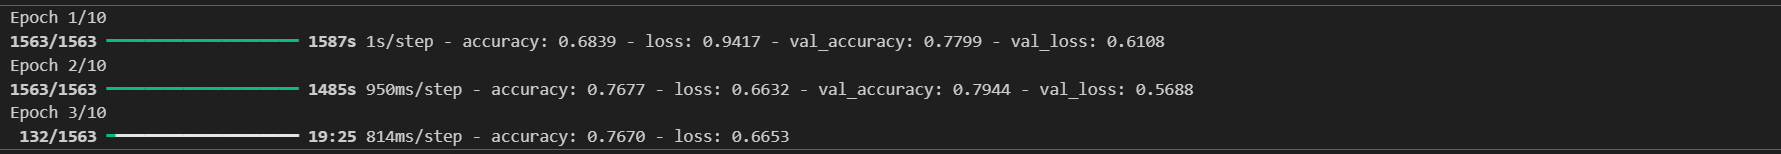